In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/MyDrive/Project1_Anne/'
df = pd.read_csv(drive_dir + 'fatal-police-shootings-data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# [Link to the LinkedIn article](https://www.linkedin.com/pulse/police-fatal-shootings-demographics-who-risk-anne-cuzeau)

# [Link to my github repository](https://github.com/Anne-Paris/Project1-Fatal_Police_Shootings.git)

# Functions Toolbox

In [68]:
def groupByCity(dfToGroup, columnName):
  dfToGroup = dfToGroup.groupby(['city']).agg({columnName : np.mean, 'id' : 'count', 'POPESTIMATE2015': np.mean})
  dfToGroup = dfToGroup.rename(columns = {'id' : 'Number_of_shootings'})
  return dfToGroup

In [69]:
def plotScatterYisNumOfShootings(dfToPlot, colName, title, xlabel, ylabel):
  dfToPlot = dfToPlot.drop(columns=['POPESTIMATE2015'])
  plt.figure(figsize=(12, 8))
  plt.scatter(x=dfToPlot[colName], y=np.log(dfToPlot['Number_of_shootings']))
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.title(title)
  plt.show()


In [70]:
def cleanupCities(dfToClean):
  dfToClean.columns = dfToClean.columns.str.lower()
  dfToClean.columns = dfToClean.columns.str.replace('geographic area','state')
  dfToClean['city'] = dfToClean['city'].str.replace(' city', '')
  dfToClean['city'] = dfToClean['city'].str.replace(' CDP', '')
  dfToClean['city'] = dfToClean['city'].str.replace(' borough', '')
  dfToClean['city'] = dfToClean['city'].str.replace(' town', '')
  dfToClean['city'] = dfToClean['city'].str.replace(' (balance)', '')

#Graph formating

In [28]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Import and Clean Population

In [29]:
population_df = pd.read_csv(drive_dir + 'Copy of sub-est2019_all.csv', encoding = "ISO-8859-1")
us_state_to_abbrev = {"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA","Colorado": "CO","Connecticut": "CT","Delaware": "DE",
                      "Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY",
                      "Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO",
                      "Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM","New York": "NY","North Carolina": "NC",
                      "North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI","South Carolina": "SC",
                      "South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA","West Virginia": "WV",
                      "Wisconsin": "WI","Wyoming": "WY","District of Columbia": "DC","American Samoa": "AS","Guam": "GU","Northern Mariana Islands": "MP","Puerto Rico": "PR",
                      "United States Minor Outlying Islands": "UM","U.S. Virgin Islands": "VI",}

population_df["state"] = population_df['STNAME'].map(us_state_to_abbrev)
population_df = population_df.rename(columns={'NAME':'city'})
population_2015_df = population_df[['city','state','POPESTIMATE2015']]
population_2015_df['city'] = population_2015_df['city'].str.replace(' city','')
population_2015_df['city'] = population_2015_df['city'].str.replace(' town','')
population_2015_df['city'] = population_2015_df['city'].str.replace(' CDP','')
population_2015_df['city'] = population_2015_df['city'].str.replace(' borough','')
population_2015_df['city'] = population_2015_df['city'].str.replace(' and borough','')

population_2015_df =  population_2015_df[['city', 'state', 'POPESTIMATE2015']]
population_2015_df

<ipython-input-29-d9a872017366>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2015_df['city'] = population_2015_df['city'].str.replace(' city','')
<ipython-input-29-d9a872017366>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2015_df['city'] = population_2015_df['city'].str.replace(' town','')
<ipython-input-29-d9a872017366>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,city,state,POPESTIMATE2015
0,Alabama,AL,4852347
1,Abbeville,AL,2600
2,Adamsville,AL,4390
3,Addison,AL,734
4,Akron,AL,339
...,...,...,...
81429,Balance of Washakie County,WY,2690
81430,Weston County,WY,7208
81431,Newcastle,WY,3513
81432,Upton,WY,1104


## Only consider 2015 shootings

In [30]:
df2015 = df[(df['date'] >= '2015-01-01') & (df['date'] <= '2015-12-31')]
df2015.count()

id                         994
name                       993
date                       994
manner_of_death            994
armed                      945
age                        986
gender                     994
race                       971
city                       994
state                      994
signs_of_mental_illness    994
threat_level               994
flee                       987
body_camera                994
longitude                  994
latitude                   994
is_geocoding_exact         994
dtype: int64

#Age: what's the max and min:

In [31]:
df['age'].max()

92.0

In [32]:
df['age'].min()

2.0

#Race

##Race distribution/City: Loading and Cleaning

In [33]:
df_raceByCity = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/police_killings/ShareRaceByCity.csv')
cleanupCities(df_raceByCity)

df_raceByCity.shape


<ipython-input-27-006335cfb464>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dfToClean['city'] = dfToClean['city'].str.replace(' (balance)', '')


(29268, 7)

## US population by race

In [34]:
raceCensus = pd.read_csv(drive_dir + 'race2010Census.csv')
#Number from 2010 Census:
totalPop2010 = 308745538

#US population by race
raceCensus['population_by_race'] = (raceCensus['%'] * 308745538)
raceCensus

,race,%,population_by_race
0,Black,0.136,4.198939e+07
1,NativeAmerican,0.013,4.013692e+06
2,Asian,0.064,1.975971e+07
3,Hispanic,0.194,5.989663e+07
4,White,0.593,1.830861e+08


## Group shootings by race for 2015

In [35]:
#Group shootings for 2015 by race
dfraceratio = df2015.groupby('race').agg({'id':'count'})

#Rename cols
dfraceratio = dfraceratio.rename(columns = {'id' : 'Number_Of_shootings'})
renamedict = {'A':'Asian', 'B':'Black', 'H': 'Hispanic', 'N' : 'NativeAmerican', 'W':'White', 'O': 'Other'}
dfraceratio = dfraceratio.rename(index = renamedict)

dfraceratio

,Number_Of_shootings
race,
Asian,17
Black,258
Hispanic,174
NativeAmerican,10
Other,10
White,502


### Get race distribution of shootings

In [36]:
rowsCt = df2015.shape[0]

dfraceratio['%_of_incident_per_race'] = (dfraceratio['Number_Of_shootings'] / rowsCt) *100
dfraceratio

,Number_Of_shootings,%_of_incident_per_race
race,,
Asian,17,1.710262
Black,258,25.955734
Hispanic,174,17.505030
NativeAmerican,10,1.006036
Other,10,1.006036
White,502,50.503018


### Merge census data and incidients

In [37]:
dfRaceMerged = pd.merge(dfraceratio, raceCensus, how="inner", on=["race"])


### Plot Incidents By Race

In [38]:
dfRaceMerged['incident_rate_per_total_population_per1000k'] = (dfRaceMerged['Number_Of_shootings']/dfRaceMerged['population_by_race']) * 1000000
dfRaceMerged

,race,Number_Of_shootings,%_of_incident_per_race,%,population_by_race,incident_rate_per_total_population_per1000k
0,Asian,17,1.710262,0.064,1.975971e+07,0.860336
1,Black,258,25.955734,0.136,4.198939e+07,6.144409
2,Hispanic,174,17.505030,0.194,5.989663e+07,2.905005
3,NativeAmerican,10,1.006036,0.013,4.013692e+06,2.491472
4,White,502,50.503018,0.593,1.830861e+08,2.741879


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

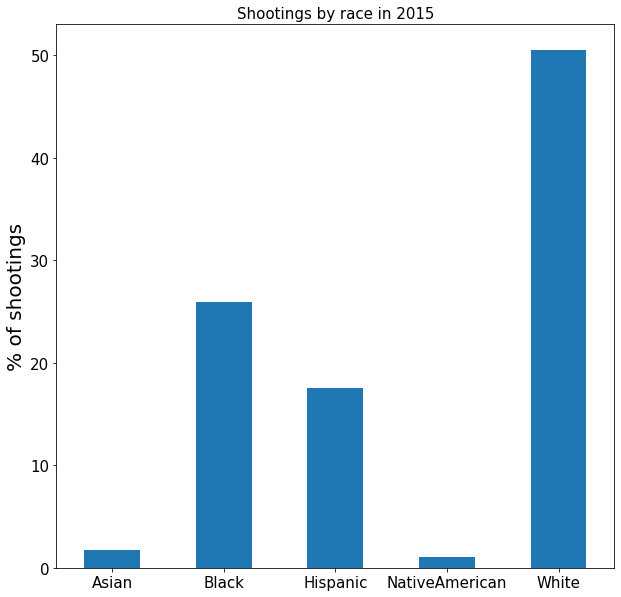

In [39]:
ratio_of_incident_per_raceDF = dfRaceMerged[['race', '%_of_incident_per_race']]
ratio_of_incident_per_raceDF.plot(
    kind='bar', 
    x='race', 
    y='%_of_incident_per_race', 
    title='Shootings by race in 2015',
    figsize=(10,10), 
    xlabel='', 
    ylabel='% of shootings',
    legend = None)
plt.xticks(rotation=0)

,race,incident_rate_per_total_population_per1000k
0,Asian,0.860336
1,Black,6.144409
2,Hispanic,2.905005
3,NativeAmerican,2.491472
4,White,2.741879


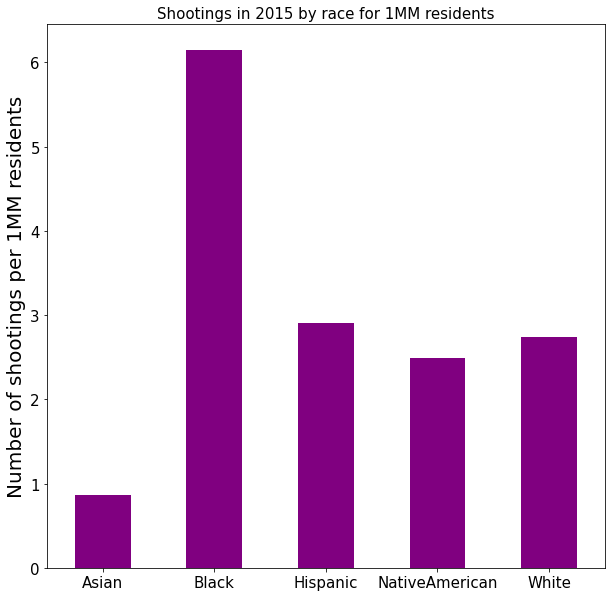

In [40]:
incident_rate_per_total_population_per1000kDF = dfRaceMerged[['race', 'incident_rate_per_total_population_per1000k']]
incident_rate_per_total_population_per1000kDF.plot(
    kind='bar', 
    x='race', 
    y='incident_rate_per_total_population_per1000k', 
    title='Shootings in 2015 by race for 1MM residents',
    xlabel='', 
    ylabel='Number of shootings per 1MM residents', 
    color='purple',
    figsize=(10,10),
    legend=None)
plt.xticks(rotation=0)
incident_rate_per_total_population_per1000kDF

# Gender

In [41]:
#Group shootings for 2015 by gender and race
dfGender1 = df2015.groupby(['gender']).agg({'id':'count'})
dfGender1 = dfGender1.reset_index()
#Rename cols
dfGender1 = dfGender1.rename(columns = {'id' : 'Number_Of_shootings'})
dfGender1

,gender,Number_Of_shootings
0,F,42
1,M,952


In [42]:
#Group shootings for 2015 by gender and race
dfGender = df2015.groupby(['gender', 'race']).agg({'id':'count'})

#Rename cols
dfGender = dfGender.rename(columns = {'id' : 'Number_Of_shootings'})
renamedict = {'A':'Asian', 'B':'Black', 'H': 'Hispanic', 'N' : 'NativeAmerican', 'W':'White', 'O': 'Other'}
dfGender = dfGender.rename(index = renamedict)

dfGender = dfGender.reset_index()
dfGender

,gender,race,Number_Of_shootings
0,F,Asian,1
1,F,Black,10
2,F,Hispanic,3
3,F,Other,1
4,F,White,27
5,M,Asian,16
6,M,Black,248
7,M,Hispanic,171
8,M,NativeAmerican,10
9,M,Other,9


In [43]:
gender_US = {'F': .506, 'M':.494}
dfGender['gender_US'] = dfGender['gender'].map(gender_US)

dfGender

,gender,race,Number_Of_shootings,gender_US
0,F,Asian,1,0.506
1,F,Black,10,0.506
2,F,Hispanic,3,0.506
3,F,Other,1,0.506
4,F,White,27,0.506
5,M,Asian,16,0.494
6,M,Black,248,0.494
7,M,Hispanic,171,0.494
8,M,NativeAmerican,10,0.494
9,M,Other,9,0.494


In [44]:
rowsCt = df2015.shape[0]
dfGenderraceratio = dfGender
dfGenderraceratio['%_of_incident_per_race_and_Gender'] = (dfGenderraceratio['Number_Of_shootings'] / rowsCt) *100
dfGenderraceratio

,gender,race,Number_Of_shootings,gender_US,%_of_incident_per_race_and_Gender
0,F,Asian,1,0.506,0.100604
1,F,Black,10,0.506,1.006036
2,F,Hispanic,3,0.506,0.301811
3,F,Other,1,0.506,0.100604
4,F,White,27,0.506,2.716298
5,M,Asian,16,0.494,1.609658
6,M,Black,248,0.494,24.949698
7,M,Hispanic,171,0.494,17.203219
8,M,NativeAmerican,10,0.494,1.006036
9,M,Other,9,0.494,0.905433


--> Black male are at a higher risk!

In [45]:
dfGenderraceratio = pd.merge(dfGenderraceratio, raceCensus, how="inner", on=["race"])
dfGenderraceratio

,gender,race,Number_Of_shootings,gender_US,%_of_incident_per_race_and_Gender,%,population_by_race
0,F,Asian,1,0.506,0.100604,0.064,1.975971e+07
1,M,Asian,16,0.494,1.609658,0.064,1.975971e+07
2,F,Black,10,0.506,1.006036,0.136,4.198939e+07
3,M,Black,248,0.494,24.949698,0.136,4.198939e+07
4,F,Hispanic,3,0.506,0.301811,0.194,5.989663e+07
5,M,Hispanic,171,0.494,17.203219,0.194,5.989663e+07
6,F,White,27,0.506,2.716298,0.593,1.830861e+08
7,M,White,475,0.494,47.786720,0.593,1.830861e+08
8,M,NativeAmerican,10,0.494,1.006036,0.013,4.013692e+06


In [46]:
dfGenderraceratio['incident_rate_per_total_population_per1MM'] = (dfGenderraceratio['Number_Of_shootings']/dfGenderraceratio['population_by_race']) * 1000000
dfGenderraceratio

,gender,race,Number_Of_shootings,gender_US,%_of_incident_per_race_and_Gender,%,population_by_race,incident_rate_per_total_population_per1MM
0,F,Asian,1,0.506,0.100604,0.064,1.975971e+07,0.050608
1,M,Asian,16,0.494,1.609658,0.064,1.975971e+07,0.809728
2,F,Black,10,0.506,1.006036,0.136,4.198939e+07,0.238155
3,M,Black,248,0.494,24.949698,0.136,4.198939e+07,5.906253
4,F,Hispanic,3,0.506,0.301811,0.194,5.989663e+07,0.050086
5,M,Hispanic,171,0.494,17.203219,0.194,5.989663e+07,2.854918
6,F,White,27,0.506,2.716298,0.593,1.830861e+08,0.147472
7,M,White,475,0.494,47.786720,0.593,1.830861e+08,2.594408
8,M,NativeAmerican,10,0.494,1.006036,0.013,4.013692e+06,2.491472


#Median HouseHold Income

##Median HouseHold Income: Loading and cleaning

In [47]:
df_income = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/police_killings/MedianHouseholdIncome2015.csv', encoding = 'unicode_escape')
cleanupCities(df_income)

<ipython-input-27-006335cfb464>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dfToClean['city'] = dfToClean['city'].str.replace(' (balance)', '')


## Merge Median Income and Incidents

In [48]:
dfincome5 = pd.merge(df2015, df_income, how="inner", on=["state", "city"])
dfincome5 = pd.merge(dfincome5, population_2015_df, how="inner", on=["state", "city"])
dfincome5['median income'] = pd.to_numeric(dfincome5['median income'], errors="coerce")
dfincome5['date'] = pd.to_datetime(dfincome5['date'], errors="coerce")

dfincome5 = dfincome5.drop_duplicates(subset='id').reset_index(drop=True)
dfincome5.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,median income,POPESTIMATE2015
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,37072.0,9789
1,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,45947.0,389412
2,765,Nicholas Garner,2015-08-22,shot,NaN,26.0,M,W,Wichita,KS,False,attack,Car,False,-97.413,37.673,True,45947.0,389412
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,81294.0,863010
4,182,Amilcar Perez-Lopez,2015-02-26,shot,knife,21.0,M,H,San Francisco,CA,False,other,Not fleeing,False,-122.414,37.751,True,81294.0,863010


## Group incidents by city

In [49]:
dfincome5 =  groupByCity(dfincome5, 'median income')


## Scatter plot, "normalized" for population & Correlation Coef

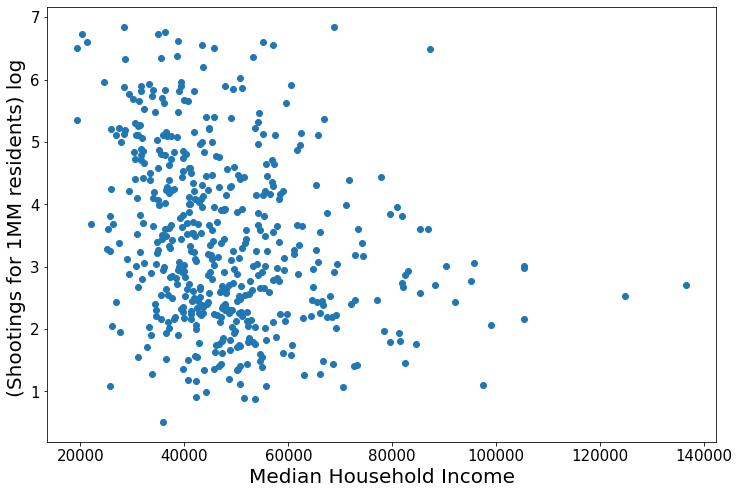

,median income,Number_of_shootings
median income,1.000000,-0.201948
Number_of_shootings,-0.201948,1.000000


In [50]:
#For each city, take the number of shootings and divide by pop estimate. *100K to get per 100k residents
dfincome5['Number_of_shootings'] = (dfincome5['Number_of_shootings']/dfincome5['POPESTIMATE2015']) * 1000000

#Remove outliers
dfincome5 = dfincome5[(dfincome5['Number_of_shootings'] > 1) & (dfincome5['Number_of_shootings'] < 1000)]

#Remove col for plotting
dfplot = dfincome5.drop(columns=['POPESTIMATE2015'])

#Plot
plt.figure(figsize=(12, 8))
plt.scatter(x=dfplot['median income'], y=np.log(dfplot['Number_of_shootings']))
plt.ylabel('(Shootings for 1MM residents) log ')
plt.xlabel('Median Household Income')
plt.show()
dfplot.corr()

#Education

In [51]:
completed_highschool_df = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/police_killings/PercentOver25CompletedHighSchool.csv', encoding = "ISO-8859-1")
completed_highschool_df['percent_completed_hs'] = completed_highschool_df['percent_completed_hs'].str.strip('-').str.strip('')
completed_highschool_df = completed_highschool_df[completed_highschool_df['percent_completed_hs'] != '']
completed_highschool_df['percent_completed_hs'] = completed_highschool_df['percent_completed_hs'].astype('float64')
completed_highschool_df['City'] = completed_highschool_df['City'].str.replace(' city','')
completed_highschool_df['City'] = completed_highschool_df['City'].str.replace(' town','')
completed_highschool_df['City'] = completed_highschool_df['City'].str.replace(' CDP','')
completed_highschool_df['City'] = completed_highschool_df['City'].str.replace(' borough','')
completed_highschool_df.rename(columns = {'City':'city', 'Geographic Area': 'state'}, inplace = True)

In [52]:
edu_df = pd.merge(completed_highschool_df, df2015, how="inner", on=["city", "state"])
edu_df.head()

,state,city,percent_completed_hs,id,name,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,AL,Arab,87.6,769,Christopher Ray Tompkins,2015-08-23,shot,gun,36.0,M,W,False,attack,Car,False,-86.512,34.274,True
1,AL,Bay Minette,79.1,307,Gilbert Fleury,2015-03-11,shot,gun,54.0,M,W,False,attack,Not fleeing,False,-87.891,30.862,True
2,AL,Birmingham,85.1,255,Douglas Harris,2015-02-20,shot,gun,77.0,M,B,True,attack,Not fleeing,False,-86.724,33.564,True
3,AL,Clanton,76.8,557,Wendy Chappell,2015-06-17,shot,gun,40.0,F,W,False,attack,Car,False,-86.625,32.886,True
4,AL,Dadeville,73.7,142,Fletcher Ray Stewart,2015-02-11,shot,toy weapon,46.0,M,W,True,attack,Foot,True,-85.724,32.864,True


In [53]:
eduAndPop_df = pd.merge(edu_df, population_2015_df, how="inner", on=["city", "state"])
eduAndPop_df = eduAndPop_df.drop_duplicates(subset='id').reset_index(drop=True)
eduAndPop_df.head()

,state,city,percent_completed_hs,id,name,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,POPESTIMATE2015
0,AL,Arab,87.6,769,Christopher Ray Tompkins,2015-08-23,shot,gun,36.0,M,W,False,attack,Car,False,-86.512,34.274,True,8232
1,AL,Bay Minette,79.1,307,Gilbert Fleury,2015-03-11,shot,gun,54.0,M,W,False,attack,Not fleeing,False,-87.891,30.862,True,8975
2,AL,Birmingham,85.1,255,Douglas Harris,2015-02-20,shot,gun,77.0,M,B,True,attack,Not fleeing,False,-86.724,33.564,True,212259
3,AL,Clanton,76.8,557,Wendy Chappell,2015-06-17,shot,gun,40.0,F,W,False,attack,Car,False,-86.625,32.886,True,8682
4,AL,Dadeville,73.7,142,Fletcher Ray Stewart,2015-02-11,shot,toy weapon,46.0,M,W,True,attack,Foot,True,-85.724,32.864,True,3127


##Remove shootings involving victims younger than 25

In [54]:
OlderThan25DF = eduAndPop_df[(eduAndPop_df['age'] >= 25)]

##Scatter plot, "normalized" for population & Correlation Coef for 25+ victims



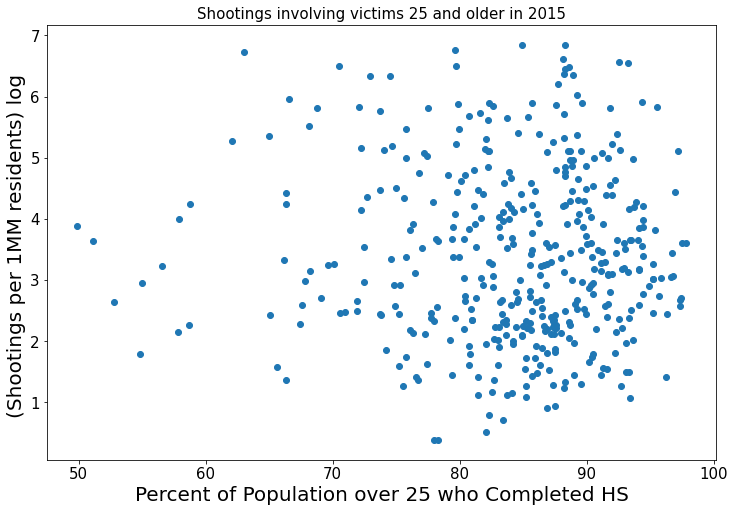

,percent_completed_hs,Number_of_shootings,POPESTIMATE2015
percent_completed_hs,1.000000,-0.051216,-0.056516
Number_of_shootings,-0.051216,1.000000,-0.216297
POPESTIMATE2015,-0.056516,-0.216297,1.000000


In [55]:
#Group by city
OlderThan25DFPlot = groupByCity(OlderThan25DF, 'percent_completed_hs')

#Adjust for population
OlderThan25DFPlot['Number_of_shootings'] = (OlderThan25DFPlot['Number_of_shootings']/OlderThan25DFPlot['POPESTIMATE2015']) *1000000

#Remove outliers
OlderThan25DFPlot = OlderThan25DFPlot[(OlderThan25DFPlot['Number_of_shootings'] > 1) & (OlderThan25DFPlot['Number_of_shootings'] < 1000)]

#Plot
plotScatterYisNumOfShootings(OlderThan25DFPlot, 'percent_completed_hs', 
                             'Shootings involving victims 25 and older in 2015', 
                             'Percent of Population over 25 who Completed HS', 
                             '(Shootings per 1MM residents) log ')

OlderThan25DFPlot.corr()

## Group (all ages) by cities

In [56]:
eduAndPop_dfGrouped = groupByCity(eduAndPop_df, 'percent_completed_hs')


In [57]:
eduAndPop_dfGrouped.head()

,percent_completed_hs,Number_of_shootings,POPESTIMATE2015
city,,,
Aiken,89.5,1,30325.0
Akron,86.3,2,198588.0
Albuquerque,89.0,5,557937.0
Alexandria,81.7,1,47761.0
Allentown,77.3,1,120071.0


##Scatter plot, "normalized" for population & Correlation Coef for all victims (regardless of age)


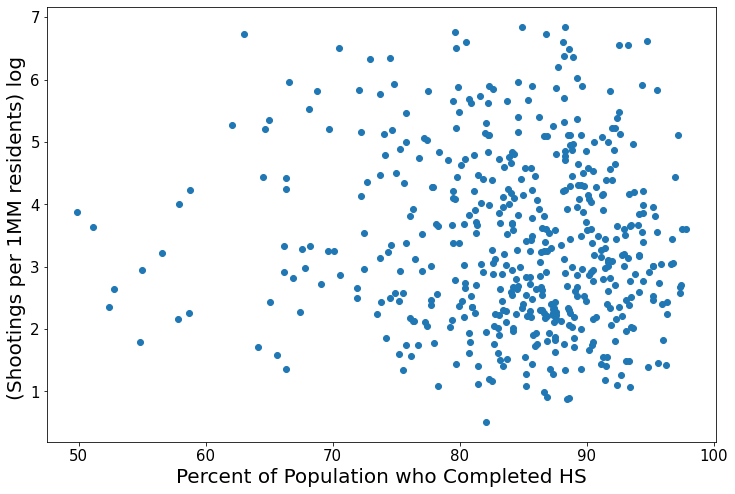

In [58]:
#adjust for population
eduAndPop_dfGrouped['Number_of_shootings'] = (eduAndPop_dfGrouped['Number_of_shootings']/eduAndPop_dfGrouped['POPESTIMATE2015']) *1000000
#remove outliers
eduAndPop_dfPlot = eduAndPop_dfGrouped[(eduAndPop_dfGrouped['Number_of_shootings'] > 1) & (eduAndPop_dfGrouped['Number_of_shootings'] < 1000)]

#Plot
plotScatterYisNumOfShootings(eduAndPop_dfPlot, 'percent_completed_hs', 
                             '', 
                             'Percent of Population who Completed HS', 
                             '(Shootings per 1MM residents) log ')


#Poverty & shootings

## Data loading and cleaning

In [59]:
df_povLevel = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/police_killings/PercentagePeopleBelowPovertyLevel.csv', encoding = 'unicode_escape')
cleanupCities(df_povLevel)

df_povLevel.count()

<ipython-input-27-006335cfb464>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dfToClean['city'] = dfToClean['city'].str.replace(' (balance)', '')


state           29329
city            29329
poverty_rate    29329
dtype: int64

##Merge with shootings and population

In [60]:
povRateMerged = pd.merge(df2015, df_povLevel, how="inner", on=["city", "state"])
povRateMerged = pd.merge(povRateMerged, population_2015_df, how="inner", on=["state", "city"])
povRateMerged = povRateMerged.drop_duplicates(subset='id').reset_index(drop=True)
povRateMerged.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,poverty_rate,POPESTIMATE2015
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,28.6,9789
1,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,17.3,389412
2,765,Nicholas Garner,2015-08-22,shot,NaN,26.0,M,W,Wichita,KS,False,attack,Car,False,-97.413,37.673,True,17.3,389412
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,13.2,863010
4,182,Amilcar Perez-Lopez,2015-02-26,shot,knife,21.0,M,H,San Francisco,CA,False,other,Not fleeing,False,-122.414,37.751,True,13.2,863010


In [61]:
povRateMerged['poverty_rate'] = pd.to_numeric(povRateMerged['poverty_rate'], errors="coerce")
povRateMerged = groupByCity(povRateMerged, 'poverty_rate')
povRateMerged.count()

poverty_rate           522
Number_of_shootings    522
POPESTIMATE2015        522
dtype: int64

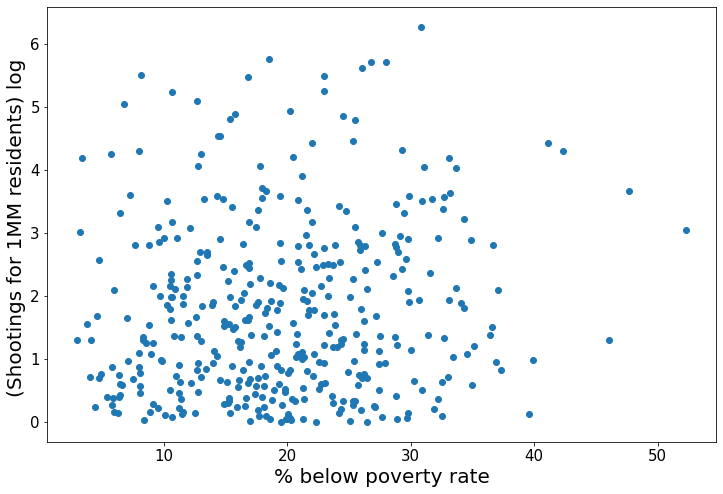

,poverty_rate,Number_of_shootings,POPESTIMATE2015
poverty_rate,1.000000,0.068730,0.033225
Number_of_shootings,0.068730,1.000000,-0.195269
POPESTIMATE2015,0.033225,-0.195269,1.000000


In [62]:
#For each city, take the number of shootings and divide by pop estimate. *100K to get per 100k residents
povRateMerged['Number_of_shootings'] = (povRateMerged['Number_of_shootings']/povRateMerged['POPESTIMATE2015']) *100000

#Remove outliers
povRateMerged2 = povRateMerged[(povRateMerged['Number_of_shootings'] > 1) & (povRateMerged['Number_of_shootings'] < 1000)]

#Remove col for plotting
povRateMergedplot = povRateMerged2.drop(columns=['POPESTIMATE2015'])

#Plot
plt.figure(figsize=(12, 8))
plt.scatter(x=povRateMergedplot['poverty_rate'], y=np.log(povRateMergedplot['Number_of_shootings']))
plt.ylabel('(Shootings for 1MM residents) log ')
plt.xlabel('% below poverty rate')
plt.show()
povRateMerged2.corr()

# Putting it all together

Per Shyla's analysis on age: focus on 20 to 24
and per my analysis on race: Black male

In [63]:
dfAgeGenderRace = df2015[(df2015['age'] >= 20) & (df['age'] <= 24) & (df2015['race'] == 'B') & (df2015['gender'] >= 'M')]
BMShot2024 = dfAgeGenderRace.shape[0]
BMShot2024 = BMShot2024/df2015.shape[0]
print(f'% of Black Male shot in 2015 compared to total incidents = {BMShot2024 * 100} %')

% of Black Male shot in 2015 compared to total incidents = 4.527162977867203 %


<ipython-input-63-4c1dd07cc27c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfAgeGenderRace = df2015[(df2015['age'] >= 20) & (df['age'] <= 24) & (df2015['race'] == 'B') & (df2015['gender'] >= 'M')]


In [64]:
dfAgeGender = df2015[(df2015['age'] >= 20) & (df['age'] <= 24) & (df2015['gender'] == 'M')]

#Percent of 20-24 pop
agePercent = dfAgeGender.shape[0]/df2015.shape[0]

#percent of gender from census
genderPercent = 0.494

#Group shootings for 2015 by gender and race
dfAgeGender = dfAgeGender.groupby(['gender', 'race']).agg({'id':'count'})

#Rename cols
dfAgeGender = dfAgeGender.rename(columns = {'id' : 'Number_Of_shootings'})
renamedict = {'A':'Asian', 'B':'Black', 'H': 'Hispanic', 'N' : 'NativeAmerican', 'W':'White', 'O': 'Other'}
dfAgeGender= dfAgeGender.rename(index = renamedict)

dfAgeGender = dfAgeGender.reset_index()
dfAgeGender

<ipython-input-64-b813a240885a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfAgeGender = df2015[(df2015['age'] >= 20) & (df['age'] <= 24) & (df2015['gender'] == 'M')]


,gender,race,Number_Of_shootings
0,M,Black,45
1,M,Hispanic,27
2,M,NativeAmerican,2
3,M,Other,2
4,M,White,46


In [65]:
dfAgeGender = pd.merge(dfAgeGender, raceCensus, how="inner", on=["race"])
dfAgeGender

,gender,race,Number_Of_shootings,%,population_by_race
0,M,Black,45,0.136,4.198939e+07
1,M,Hispanic,27,0.194,5.989663e+07
2,M,NativeAmerican,2,0.013,4.013692e+06
3,M,White,46,0.593,1.830861e+08


In [66]:
#adjust for US pop
dfAgeGender['popPerMaleRace'] = (agePercent * genderPercent * dfAgeGender['%']) * 308745538

#for 1M
dfAgeGender['shootingsPer1MM'] = (dfAgeGender['Number_Of_shootings']/dfAgeGender['popPerMaleRace']) * 1000000
dfAgeGender

,gender,race,Number_Of_shootings,%,population_by_race,popPerMaleRace,shootingsPer1MM
0,M,Black,45,0.136,4.198939e+07,2.566760e+06,17.531830
1,M,Hispanic,27,0.194,5.989663e+07,3.661408e+06,7.374213
2,M,NativeAmerican,2,0.013,4.013692e+06,2.453521e+05,8.151552
3,M,White,46,0.593,1.830861e+08,1.119183e+07,4.110141


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

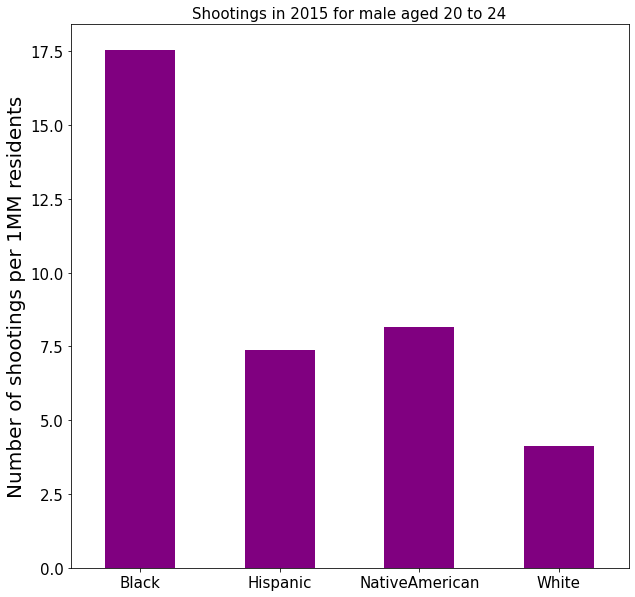

In [67]:
plotFinal = dfAgeGender[['race', 'shootingsPer1MM']]
plotFinal.plot(
    kind='bar', 
    x='race', 
    y='shootingsPer1MM', 
    title='Shootings in 2015 for male aged 20 to 24',
    xlabel='', 
    ylabel='Number of shootings per 1MM residents', 
    color='purple',
    figsize=(10,10),
    legend=None)
plt.xticks(rotation=0)